In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [2]:
df=pd.read_csv("training.csv")

In [3]:
df=pd.read_csv("training1.csv")

,nama,jeniskelamin,kehadiran,kinerja,attitude,bobot,keterangan
0,Andrianto,Pria,Bagus,Bagus,Bagus,0.8,TepatWaktu
1,Eva sutihat,Wanita,Bagus,Sedang,Sedang,0.6,TepatWaktu
2,Deni,Pria,Sedang,Bagus,Bagus,0.5,TepatWaktu
3,H.sanusi,Pria,Bagus,Sedang,Bagus,0.4,TepatWaktu
4,Masitoh,Wanita,Bagus,Sedang,Bagus,0.4,TepatWaktu
5,Ewin,Wanita,Bagus,Bagus,Sedang,0.5,TepatWaktu
6,Suryanah,Wanita,Sedang,Bagus,Sedang,0.5,Terlambat
7,Ifat Hanifah,Wanita,Bagus,Sedang,Bagus,0.4,Terlambat
8,Heri Julanto,Pria,Bagus,Sedang,Sedang,0.5,TepatWaktu
9,Yati rohayati,wanita,Bagus,Bagus,Bagus,0.5,Terlambat


In [4]:
df=pd.read_csv("training1.csv")

In [5]:
X= df.drop(columns="keterangan")
y=df.keterangan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 6), (3, 6), (12,), (3,))

In [6]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ['nama','jeniskelamin','kehadiran','kinerja','attitude','bobot']),
])

In [7]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB()),
    
])


In [9]:
pipeline.score(X_train, y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

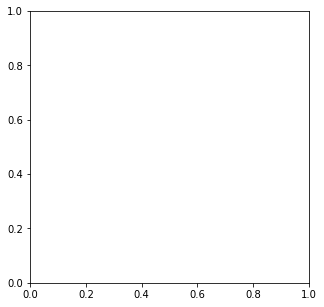

In [10]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)